In [4]:
from google.colab import files
uploaded = files.upload()

Saving original.csv to original (1).csv


**Importing the Library**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [0]:
import io
data = pd.read_csv(io.BytesIO(uploaded['original.csv']))

In [7]:
data.head(10)

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0
5,-9,15.8
6,-8,17.6
7,-7,19.4
8,-6,21.2
9,-5,23.0


In [8]:
data.tail()

,Celsius,Fahrenheit
25,20,68.0
26,30,86.0
27,40,104.0
28,50,122.0
29,60,140.0


In [9]:
data.shape

(30, 2)

In [10]:
data.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
Celsius       30 non-null int64
Fahrenheit    30 non-null float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


**Visualization Dataset**

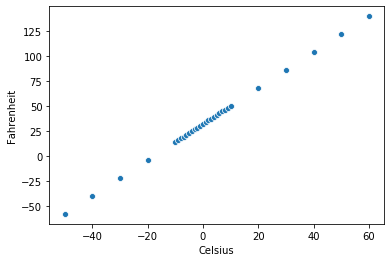

In [13]:
sns.scatterplot(data['Celsius'], data['Fahrenheit'])

**Create Training and testing Dataset**

In [0]:
x_train = data['Celsius']
y_train = data['Fahrenheit']

**Build and train our model**

In [15]:
x_train.shape

(30,)

In [17]:
y_train.shape

(30,)

In [18]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape = [1]))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.5), loss = 'mean_squared_error')

In [32]:
epoc_hist = model.fit(x_train, y_train, epochs=500)

Train on 30 samples
Epoch 1/500
30/30 [==============================] - 0s 160us/sample - loss: 0.0013
Epoch 2/500
30/30 [==============================] - 0s 79us/sample - loss: 0.0012
Epoch 3/500
30/30 [==============================] - 0s 48us/sample - loss: 0.0012
Epoch 4/500
30/30 [==============================] - 0s 47us/sample - loss: 0.0011
Epoch 5/500
30/30 [==============================] - 0s 69us/sample - loss: 0.0011
Epoch 6/500
30/30 [==============================] - 0s 45us/sample - loss: 0.0011
Epoch 7/500
30/30 [==============================] - 0s 52us/sample - loss: 9.9355e-04
Epoch 8/500
30/30 [==============================] - 0s 50us/sample - loss: 9.1698e-04
Epoch 9/500
30/30 [==============================] - 0s 49us/sample - loss: 8.4132e-04
Epoch 10/500
30/30 [==============================] - 0s 53us/sample - loss: 7.7621e-04
Epoch 11/500
30/30 [==============================] - 0s 48us/sample - loss: 7.2370e-04
Epoch 12/500
30/30 [========================

**Evaluate the model**

In [33]:
epoc_hist.history.keys()

dict_keys(['loss'])

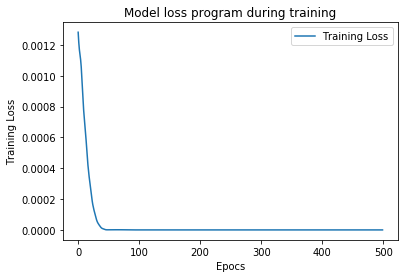

In [34]:
plt.plot(epoc_hist.history['loss'])
plt.title("Model loss program during training")
plt.xlabel("Epocs")
plt.ylabel("Training Loss")
plt.legend(["Training Loss"])

In [35]:
model.get_weights()

[array([[1.8]], dtype=float32), array([32.00002], dtype=float32)]

In [38]:
Temp_C = 0
Temp_F = model.predict([Temp_C])
print("Tempreture in Defg Using Trained ANN", Temp_F)

Tempreture in Defg Using Trained ANN [[32.00002]]


In [39]:
# Lets Conform with the equation.

Temp_F = 9/5 * Temp_C + 32
print("Tempreture in Defg Using Euation", Temp_F)

Tempreture in Defg Using Euation 32.0


In [42]:
Temp_C = 50
Temp_F = model.predict([Temp_C])
print("Tempreture in Defg Using Trained ANN", Temp_F)

Tempreture in Defg Using Trained ANN [[122.000015]]


In [43]:
# Lets Conform with the equation.

Temp_F = 9/5 * Temp_C + 32
print("Tempreture in Defg Using Euation", Temp_F)

Tempreture in Defg Using Euation 122.0
